In [1]:
%load_ext autoreload
%autoreload 2

import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2024-04-15 22:39:20,490 | INFO     |: info
2024-04-15 22:39:20,493 | WARNING  |: warning
2024-04-15 22:39:20,493 | ERROR    |: error
2024-04-15 22:39:20,494 | CRITICAL |: critical


In [3]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-04-15 22:39:22,239 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-04-15 22:39:27,360 | INFO     |: Connected to c0:89:c1:6d:24:4b


C:\Users\xyx07\Fast_Robot\Webpage\FR-2024\code\Lab6\Angle\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [4]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

IMU data received.


In [17]:
raw_message=[]
#add more arrays if needed
num = []
timeIMU = [] #in seconds
xAcc = [] 
yAcc = []
zAcc = []
xGyr = [] 
yGyr = []
zGyr = []
def clear_data():
    # Clear all the sensor data arrays
    timeIMU.clear()
    xAcc.clear()
    yAcc.clear()
    zAcc.clear()
    xGyr.clear()
    yGyr.clear()
    zGyr.clear()
def notification_handler(uuid, byte_array):
    global timeIMU,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    message = ble.bytearray_to_string(byte_array)
    if message=='IMU data received.':
        print(message)
    else: 
        readings = message.split('|')
        num.clear()
        for reading in readings:
            label, value = reading.split(':')
            num.append(float(value))
        if len(num)==7:
            if label=="Gyr-Z":
                timeIMU.append(num[0]/1000)
                xAcc.append(num[1])
                yAcc.append(num[2])
                zAcc.append(num[3])
                xGyr.append(num[4])
                yGyr.append(num[5])
                zGyr.append(num[6])

In [23]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [24]:
clear_data()
ble.send_command(CMD.GET_IMU_DATA, "")

IMU data received.


In [25]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [26]:
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 0.997s to collect data.
Sample rate is about 256 samples/s.


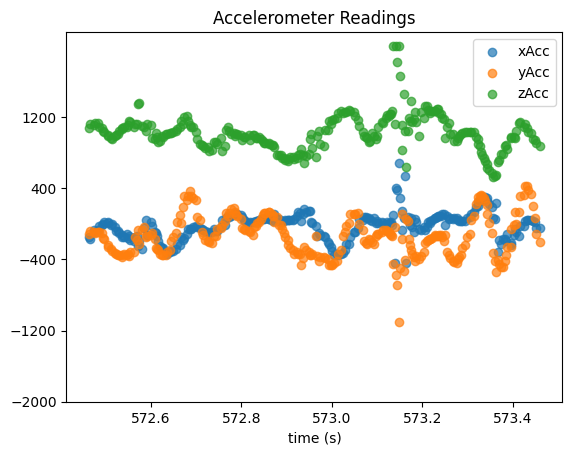

In [27]:
plt.scatter(timeIMU, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(timeIMU, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(timeIMU, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();

In [10]:
ble.stop_notify(ble.uuid['RX_STRING'])

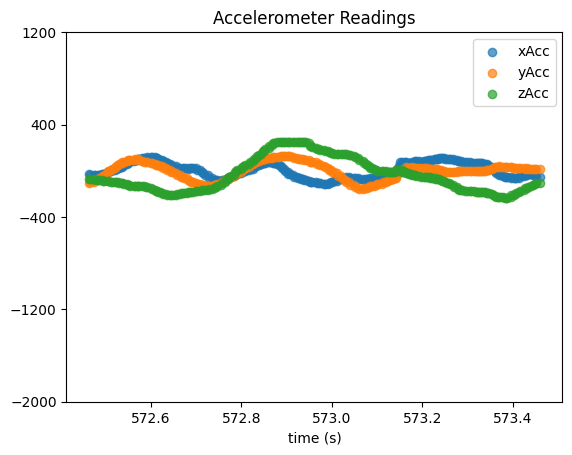

2024-04-16 01:21:19,691 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


In [29]:
plt.scatter(timeIMU, xGyr, label = 'xAcc', alpha=0.7)
plt.scatter(timeIMU, yGyr, label = 'yAcc', alpha=0.7)
plt.scatter(timeIMU, zGyr, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();

In [16]:
# Disconnect
ble.disconnect()

2024-03-10 15:23:36,134 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


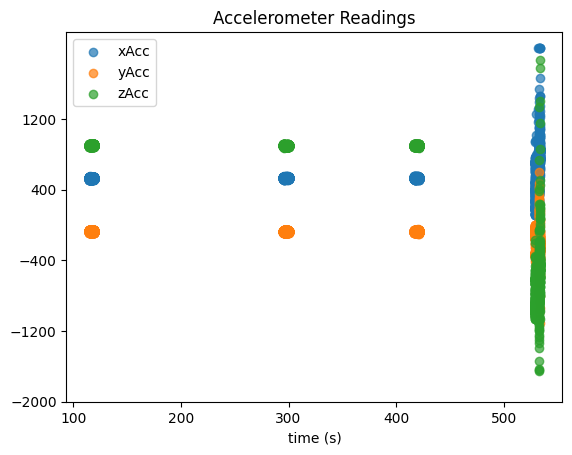

In [38]:
plt.scatter(time, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(time, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(time, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();

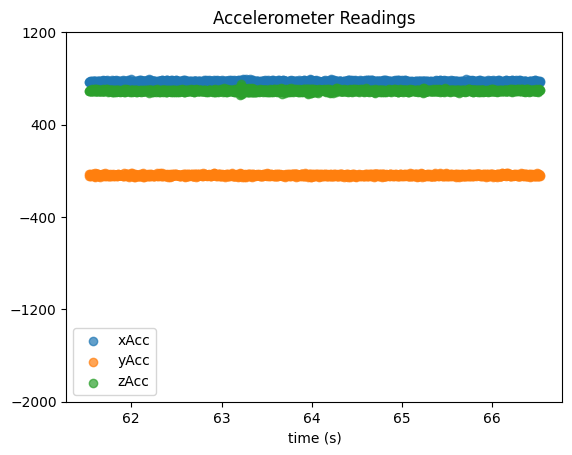

In [17]:
plt.scatter(time, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(time, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(time, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();